Import frameworks:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import pandas as pd
import re

Load the data set and print out head and tail.
The data source is: https://www.kaggle.com/nobelfoundation/nobel-laureates?select=archive.csv.

In [2]:
nobelPrices = data=pd.read_csv("nobel-prices.csv")
nobelPrices

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


Get all nobel price winners:

In [3]:
print(*nobelPrices['Full Name'].unique(), sep='\n')

Jacobus Henricus van 't Hoff
Sully Prudhomme
Emil Adolf von Behring
Jean Henry Dunant
Frédéric Passy
Wilhelm Conrad Röntgen
Hermann Emil Fischer
Christian Matthias Theodor Mommsen
Ronald Ross
Élie Ducommun
Charles Albert Gobat
Hendrik Antoon Lorentz
Pieter Zeeman
Svante August Arrhenius
Bjørnstjerne Martinus Bjørnson
Niels Ryberg Finsen
William Randal Cremer
Antoine Henri Becquerel
Pierre Curie
Marie Curie, née Sklodowska
Sir William Ramsay
Frédéric Mistral
José Echegaray y Eizaguirre
Ivan Petrovich Pavlov
Institut de droit international (Institute of International Law)
Lord Rayleigh (John William Strutt)
Johann Friedrich Wilhelm Adolf von Baeyer
Henryk Sienkiewicz
Robert Koch
Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau
Philipp Eduard Anton von Lenard
Henri Moissan
Giosuè Carducci
Camillo Golgi
Santiago Ramón y Cajal
Theodore Roosevelt
Joseph John Thomson
Eduard Buchner
Rudyard Kipling
Charles Louis Alphonse Laveran
Ernesto Teodoro Moneta
Loui

Show the gender distribution of Nobel laureates.

[]

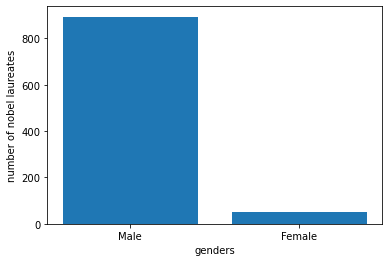

In [4]:
# get sums of nobel laureates relative to their sex
genders = pd.DataFrame(nobelPrices['Sex'].value_counts())

# plot the result as a bar chart
_ = plt.bar(genders.index.values, genders['Sex'])
plt.ylabel('number of nobel laureates')
plt.xlabel('genders')
plt.plot()

Show the distribution of the ages at which the laureates were awarded their nobel price.

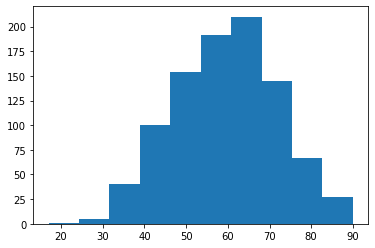

In [5]:
# Get year from timestamp
def getYear(timestamp):
    match = re.match('^(\d{4})-\d{2}-\d{2}$', str(timestamp))
    return int(match.group(1)) if match else pd.NaT

# Calculate ages
nobelPrices['Age'] = (nobelPrices['Year'] - list(map(getYear, nobelPrices['Birth Date'])))

# Plot Ages
_ = plt.hist(nobelPrices['Age'].dropna())
plt.show()

Youngest and oldest nobell prize winner:

In [6]:
youngestWinner = nobelPrices[nobelPrices.Age == nobelPrices.Age.min()]
oldestWinner = nobelPrices[nobelPrices.Age == nobelPrices.Age.max()]

print(f'The youngest winner is {youngestWinner["Full Name"].iloc[0]} with {youngestWinner["Age"].iloc[0]} years.')
print(f'The oldest winner is {oldestWinner["Full Name"].iloc[0]} with {oldestWinner["Age"].iloc[0]} years.')

The youngest winner is Malala Yousafzai with 17 years.
The oldest winner is Leonid Hurwicz with 90 years.


Plot all winners with more than one nobel price:

[]

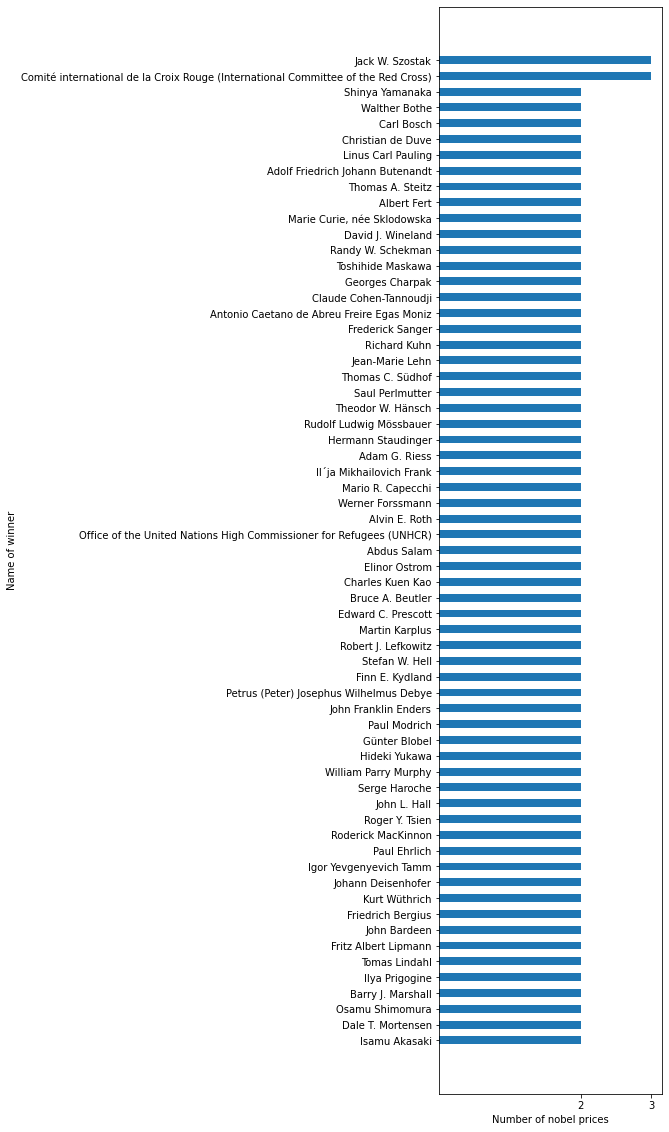

In [7]:
nameCounts = nobelPrices['Full Name'].value_counts()
multiWinners = nameCounts[nameCounts > 1].sort_values(ascending=True)

# plot the result as a bar chart
plt.figure(figsize=(4,20))
_ = plt.barh(list(multiWinners.index), list(multiWinners), .5)
plt.ylabel('Name of winner')
plt.xlabel('Number of nobel prices')
plt.xticks([2, 3])
plt.plot()